# Time Series

In [1]:
import pandas as pd

In [7]:
df = pd.read_csv('https://cli.fusio.net/cli/climate_data/webdata/hly575.csv', skiprows = 17, low_memory=False, nrows = 1000)

In [11]:
df['datetime'] = pd.to_datetime(df['date']) # figure out how to decode object as a python datetime format type, and creating a new column based on this result

In [12]:
df

,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,msl,ind.3,wdsp,ind.4,wddir,datetime
0,01-aug-2003 01:00,-1,,4,,4,,,,,,7,,7,,2003-08-01 01:00:00
1,01-aug-2003 02:00,-1,,4,,4,,,,,,7,,7,,2003-08-01 02:00:00
2,01-aug-2003 03:00,-1,,4,,4,,,,,,7,,7,,2003-08-01 03:00:00
3,01-aug-2003 04:00,-1,,4,,4,,,,,,7,,7,,2003-08-01 04:00:00
4,01-aug-2003 05:00,-1,,4,,4,,,,,,7,,7,,2003-08-01 05:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,11-sep-2003 12:00,0,0.0,0,18.3,0,15.0,12.4,14.4,68,1018.6,2,12,2,270,2003-09-11 12:00:00
996,11-sep-2003 13:00,0,0.0,0,19.3,0,15.0,11.6,13.7,61,1019.1,2,13,2,290,2003-09-11 13:00:00
997,11-sep-2003 14:00,0,0.0,0,18.8,0,14.0,9.7,12.1,55,1020.2,2,14,2,290,2003-09-11 14:00:00
998,11-sep-2003 15:00,0,0.0,0,18.1,0,13.5,9.4,11.8,57,1021.2,2,13,2,300,2003-09-11 15:00:00


In [13]:
import seaborn as sns

<AxesSubplot:xlabel='datetime', ylabel='temp'>

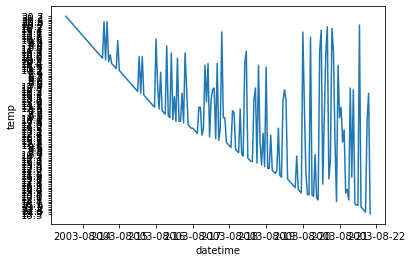

In [22]:
sns.lineplot(x = 'datetime' , y = 'temp', data = df[300:500] )

***

In [24]:
# Adapted from lecture notes

# 72 hours starting with midnight Jan 1st 2011
rng = pd.date_range('1/1/2011', periods =72, freq='H') #starting midnight, created 72 hours periods. Use an index for new dataframe

In [25]:
rng

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               '2011-01-01 10:00:00', '2011-01-01 11:00:00',
               '2011-01-01 12:00:00', '2011-01-01 13:00:00',
               '2011-01-01 14:00:00', '2011-01-01 15:00:00',
               '2011-01-01 16:00:00', '2011-01-01 17:00:00',
               '2011-01-01 18:00:00', '2011-01-01 19:00:00',
               '2011-01-01 20:00:00', '2011-01-01 21:00:00',
               '2011-01-01 22:00:00', '2011-01-01 23:00:00',
               '2011-01-02 00:00:00', '2011-01-02 01:00:00',
               '2011-01-02 02:00:00', '2011-01-02 03:00:00',
               '2011-01-02 04:00:00', '2011-01-02 05:00:00',
               '2011-01-02 06:00:00', '2011-01-02 07:00:00',
               '2011-01-

In [26]:
import numpy as np

In [37]:
ts = pd.DataFrame(np.random.randn(len(rng)), index=rng, columns = ['admissions'])

In [31]:
ts

,admissions
2011-01-01 00:00:00,-0.376384
2011-01-01 01:00:00,-0.572539
2011-01-01 02:00:00,0.001230
2011-01-01 03:00:00,-0.040833
2011-01-01 04:00:00,-0.256260
...,...
2011-01-03 19:00:00,0.059312
2011-01-03 20:00:00,0.351894
2011-01-03 21:00:00,-0.643950
2011-01-03 22:00:00,-0.961071


In [ ]:
# Can set the index to a datetime
# iloc for position, loc is for accessing by label

# Poisson

In [38]:
np.random.poisson(5,10) # generating numbers up to infinity, on average 5 admission. 5 is average number of events, 10 is the size

array([10,  2,  5,  6,  2,  9,  8,  6,  8,  9])

In [39]:
ts1 = pd.DataFrame(np.random.poisson(10, len(rng)), index=rng, columns = ['admissions'])

In [40]:
ts1

,admissions
2011-01-01 00:00:00,8
2011-01-01 01:00:00,7
2011-01-01 02:00:00,5
2011-01-01 03:00:00,7
2011-01-01 04:00:00,4
...,...
2011-01-03 19:00:00,9
2011-01-03 20:00:00,7
2011-01-03 21:00:00,12
2011-01-03 22:00:00,11


# Accessing and Grouping

In [41]:
ts1.mean()

admissions    9.361111
dtype: float64

In [44]:
ts1.loc['2011-01-01 03:00:00': '2011-01-02 23:00:00']  #setting ranges for dates. This will include end point unllike iloc

,admissions
2011-01-01 03:00:00,7
2011-01-01 04:00:00,4
2011-01-01 05:00:00,11
2011-01-01 06:00:00,13
2011-01-01 07:00:00,10
2011-01-01 08:00:00,10
2011-01-01 09:00:00,12
2011-01-01 10:00:00,5
2011-01-01 11:00:00,7
2011-01-01 12:00:00,11


In [45]:
ts1.loc['2011-01-01 03:00:00': '2011-01-02 23:00:00'].mean()

admissions    9.4
dtype: float64

In [48]:
ts1.resample('D').mean()  # dataset aggregated by day. 

,admissions
2011-01-01,8.750000
2011-01-02,9.708333
2011-01-03,9.625000
